<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estatística com Python: Um Guia para Estudos e Solução de Problemas


# **Classificação**

**Breve Resumo:**

Técnicas de classificação na estatística são métodos que atribuem categorias ou rótulos a dados com base em suas características, visando identificar padrões e relações. Essas técnicas são úteis em situações de análise preditiva, identificação de padrões, segmentação de dados, tomada de decisões automatizadas, classificação de texto ou imagens, e detecção de fraudes e anomalias.

**Quando Utilizar:**
- Para prever categorias de novas observações com base em padrões nos dados de treinamento.
- Identificar padrões subjacentes nos dados e atribuir rótulos ou categorias.
- Segmentar dados para compreender melhor o comportamento dos elementos.
- Automatizar tomadas de decisão, especialmente em grandes volumes de dados.
- Em tarefas de processamento de linguagem natural e reconhecimento de padrões em imagens.
- Detecção de fraudes e anomalias com base em padrões históricos.


## *Classificação com Naive Bayes*

O algoritmo Naive Bayes é um método de aprendizado de máquina é como um truque inteligente para adivinhar a categoria de algo, como um e-mail ser spam ou não. Ele usa as chances de certas palavras aparecerem em spam ou não spam. O truque "ingênuo" é assumir que as palavras são independentes, mesmo que nem sempre sejam.

- **Como Funciona:**
   1. **Treinamento:** Aprende a probabilidade das palavras aparecerem em cada categoria (spam ou não spam) tudo isso com base nos dados de treinamento.
   2. **Classificação:** Quando vê uma nova mensagem, calcula as chances de ser spam ou não spam com base nessas probabilidades e escolhe a categoria com a maior chance.

Para um melhor entendimento, chegou a hora de colocarmos em prática.

*Primeiro vamos carregar uma base de dados!*

### **Carregando os dados**

In [ ]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Manipulação de arquivos
import pandas as pd

# Biblioteca para funções randomicas
import random

# Funções matemáticas
import numpy as np

# Biblioteca para visualização de dados
import seaborn as sns

In [ ]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/credit_data.csv')

In [ ]:
# Observando as dimensões do Data set
df.shape

(2000, 5)

In [ ]:
# Observando os primeiros registros
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


*Tratando dados ausentes*

Verificando quais variáveis possuem dados faltantes.

In [ ]:
# Observando dados faltantes e ordenando em ordem decrescente
def soma_ausentes(dados):
    p_faltantes = dados.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': dados.columns,
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False)

soma_ausentes(df)

,Variavéis,Soma de ausentes
2,age,3
0,i#clientid,0
1,income,0
3,loan,0
4,c#default,0


É possível observar que na variável 'age' existem 3 valores ausentes. Devido à baixa quantidade de ausências, optarei por excluir essas 3 linhas contendo esses valores. Dessa maneira, essa pendência será tratada.

In [ ]:
# Excluindo as linhas com os valores ausentes
df.dropna(inplace = True)

In [ ]:
# Observando dados faltantes e ordenando em ordem decrescente
def soma_ausentes(dados):
    p_faltantes = dados.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': dados.columns,
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False)

soma_ausentes(df)

,Variavéis,Soma de ausentes
0,i#clientid,0
1,income,0
2,age,0
3,loan,0
4,c#default,0


Agora que não há mais nenhum dado ausente neste DataFrame, podemos prosseguir.

Vamos obervar os registros na variável 'c#default'

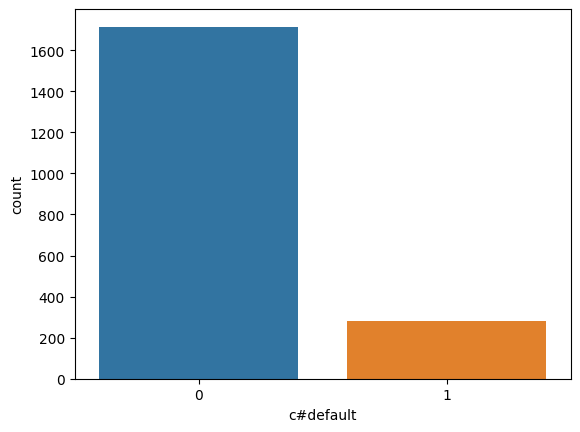

In [ ]:
# Exibindo um gráfico para observar o balanceamento da classe
sns.countplot(data=df, x='c#default');

- Podemos observar um desequilíbrio nesta variável, visto que a maioria dos registros pertence à categoria 0, enquanto a categoria 1 possui uma representação menor.

- Levando em consideração que, nesta base de dados, o número '0' representa as pessoas que pagaram um empréstimo, e o número '1' representa as pessoas que não pagaram o empréstimo, podemos afirmar claramente que a maioria quitou o empréstimo.

- Um desequilíbrio como esse pode impactar negativamente o desempenho do modelo, portanto, será necessário abordar essa discrepância.

*Dividindo o conjunto de dados para estabelecer as variáveis preditoras e a variável de resposta.*

In [ ]:
# Separando os dados em X e Y

# Variaveis preditoras
X = df.drop(['i#clientid','c#default'], axis = 1)

# Variavel resposta
y = df['c#default']


Dessa forma, armazenamos na variável X apenas 3 colunas, que representarão as variáveis preditoras, enquanto na variável y armazenamos apenas a variável resposta.

In [ ]:
# Observando as dimensões
X.shape

(1997, 3)

In [ ]:
# Observando as dimensões
y.shape

(1997,)

Com as divisões realizadas, podemos prosseguir.

### **Base de treino e teste**


Nesse momento, torna-se necessário realizar a divisão entre dados de treino e dados de teste.

In [ ]:
# Bilioteca para realizção de amostras estratificadas
from sklearn.model_selection import train_test_split

*Dividir as bases entre treino e teste*

In [ ]:
# Separando os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

Realizando as divisões do conjunto de dados em conjuntos de treinamento e teste, reservando 20% dos dados para treinamento. O parâmetro stratify=y é utilizado para garantir que a distribuição das classes na variável de resposta seja mantida nas divisões entre treino e teste.

É importante lembrar que nessa base:
- 0 = Cliente que **é** um bom pagante
- 1 = Cliente que **não** é um bom pagante

### **Aplicando o algoritmo**

Esta parte seguirá os seguintes passos:

- Importar o modelo e as métricas que serão utilizadas para análise de desempenho.
- Criar um objeto do modelo e treiná-lo com as bases que já foram separadas.
- Realizar as previsões.
- Observar o desempenho do modelo.


Realizando a importação do modelo.

In [ ]:
# Importando o modelo
from sklearn.naive_bayes import GaussianNB

*Realizando as importações das métricas*

In [ ]:
# Importando as métricas de validação
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

**Importamos as seguintes métricas:**

*Acurácia (Accuracy):*
- *O que ela diz:* "Qual a porcentagem geral de previsões corretas do modelo?"
- *Em termos simples:* "De todas as previsões que o modelo fez, quantas ele acertou?"

*Precisão (Precision):*
- *O que ela diz:* "Das vezes em que o modelo disse que algo era positivo, quantas vezes ele estava correto?"
- *Em termos simples:* "Quando o modelo disse que algo era verdadeiro, com que frequência ele estava certo?"

*Sensibilidade (Recall ou Sensitivity):*
- *O que ela diz:* "Das vezes em que algo era realmente positivo, quantas vezes o modelo o identificou corretamente?"
- *Em termos simples:* "Quando algo era verdadeiro, com que frequência o modelo o detectou?"

*F1-Score:*
- *O que ela diz:* "Uma média equilibrada entre precisão e sensibilidade."
- *Em termos simples:* "Quão equilibrado é o desempenho do modelo, considerando tanto os casos em que ele acerta positivos quanto os casos em que ele acerta negativos?"


*Criando uma instância do modelo Naive Bayes Gaussiano*

In [ ]:
# Criando o modelo
modelo = GaussianNB()

*Treinando o modelo com os dados de treinamento*

In [ ]:
# Treinando o modelo
modelo.fit(X_treino, y_treino)

GaussianNB()

*Utilizando o modelo treinado para fazer previsões nos dados de teste*

In [ ]:
# Fazendo as previsões
previsoes = modelo.predict(X_teste)

Analisando o desempenho do modelo.

In [ ]:
# Criando função para visualizar as métricas dos modelos
def metricas(real, preditos):
    print("Acurácia: {:.5f}".format(accuracy_score(real, preditos)))
    print("Precisão: {:.5f}".format(precision_score(real, preditos)))
    print("Sensibilidade: {:.5f}".format(recall_score(real, preditos)))
    print("F1-score: {:.5f}".format(f1_score(real, preditos)))

In [ ]:
# Observando a matriz de confusão
print(pd.crosstab(y_teste,previsoes, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0        333  10  343
1         26  31   57
All      359  41  400


In [ ]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, previsoes)

Acurácia: 0.91000
Precisão: 0.75610
Sensibilidade: 0.54386
F1-score: 0.63265


Podemos identificar uma acurácia alta, porém é crucial analisar as outras métricas, especialmente devido ao desbalanceamento em nossa base de dados. Neste caso, a sensibilidade está baixa, indicando que o modelo pode ter dificuldade em identificar casos positivos.

Existem técnicas que podem auxiliar em casos como esses. Elas são conhecidas como técnicas de subamostragem e sobreamostragem.

### **Subamostragem e Sobreamostragem**

**Subamostragem (Undersampling):**
- *O que é:* Reduz a quantidade da classe majoritária, removendo aleatoriamente exemplos dessa classe.
- *Como funciona:* Elimina aleatoriamente instâncias da classe majoritária para tornar as classes mais equilibradas.

**Sobreamostragem (Oversampling):**
- *O que é:* Aumenta a quantidade da classe minoritária, replicando ou gerando novos exemplos dessa classe.
- *Como funciona:* Replica instâncias da classe minoritária ou gera dados sintéticos para equalizar as distribuições de classe.

**Resumo:**
- *Subamostragem:* Reduz a classe majoritária.
- *Sobreamostragem:* Aumenta a classe minoritária.
- *Objetivo:* Equilibrar as classes para melhorar o desempenho do modelo, especialmente em conjuntos de dados desbalanceados.


#### *Subamostragem (Undersampling)*

Vamos utilizar a ténica de subamostragem chamada TomekLinks ela busca remover instâncias que possam estar causando confusão na diferenciação entre as classes majoritária e minoritária.

In [ ]:
# Importando a biblioteca
from imblearn.under_sampling import TomekLinks

In [ ]:
# Importa a técnica Tomek Links para subamostragem
tl = TomekLinks(sampling_strategy='majority')

In [38]:
# Aplicando a técnica aos dados originais X e y
X_under, y_under = tl.fit_resample(X, y)

In [39]:
# Observando as dimensões das novas bases
X_under.shape, y_under.shape

((5417, 73), (5417,))

Podemos confirmar que tivemos uma redução no número de registros; logo, a técnica de undersampling foi aplicada com sucesso.

In [ ]:
# Divide os dados subamostrados em conjuntos de treino e teste
X_treino_u, X_teste_u, y_treino_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)

In [ ]:
# Criando o modelo
modelo_u = GaussianNB()

In [ ]:
# Treinando o modelo
modelo_u.fit(X_treino_u, y_treino_u)

GaussianNB()

In [ ]:
# Fazendo as previsões
pred = modelo_u.predict(X_teste_u)

Agora, com todas as previsões feitas, vamos analisar o desempenho do modelo.

In [ ]:
# Observando a matriz de confusão
print(pd.crosstab(y_teste_u,pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0   1  All
Real                 
0        314   9  323
1         24  33   57
All      338  42  380


In [ ]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste_u, pred)

Acurácia: 0.91316
Precisão: 0.78571
Sensibilidade: 0.57895
F1-score: 0.66667


**Conclusão**

O modelo utilizando técnicas de balanceamento apresentou melhoras em diversas métricas importantes, incluindo acurácia, precisão, sensibilidade e F1-score. O modelo teve um desempenho um pouco superior, destacando-se especialmente na identificação de casos positivos.

#### *Sobreamostragem (Oversampling)*

A técnica SMOTE (Synthetic Minority Over-sampling Technique) é usada para lidar com conjuntos de dados desbalanceados, especialmente em problemas de classificação em que a classe minoritária é significativamente menor. O SMOTE cria novas instâncias sintéticas da classe minoritária, gerando amostras artificiais entre pontos já existentes.

In [ ]:
# Importando a biblioteca
from imblearn.over_sampling import SMOTE

In [ ]:
# Balanceamento da classe
oversample = SMOTE()

In [ ]:
# Aplicando a técnica aos dados originais X e y
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
# Observando as dimensões das novas bases
X_over.shape, y_over.shape

((3428, 3), (3428,))

Podemos confirmar que tivemos um aumento no número de registros; logo, a técnica de oversampling foi aplicada com sucesso.

In [ ]:
# Divide os dados subamostrados em conjuntos de treino e teste
X_treino_o, X_teste_o, y_treino_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

In [ ]:
# Criando o modelo
modelo_o = GaussianNB()

In [ ]:
# Treinando o modelo
modelo_o.fit(X_treino_o, y_treino_o)

GaussianNB()

In [ ]:
# Fazendo as previsões
pred_over = modelo_o.predict(X_teste_o)


Agora, com todas as previsões feitas, vamos analisar o desempenho do modelo.

In [ ]:
# Observando a matriz de confusão
print(pd.crosstab(y_teste_o, pred_over, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1  All
Real                  
0        313   30  343
1         16  327  343
All      329  357  686


In [ ]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste_o, pred_over)

Acurácia: 0.93294
Precisão: 0.91597
Sensibilidade: 0.95335
F1-score: 0.93429


**Conclusão**

O método com *Oversampling* demonstrou um desempenho significativamente melhor em todas as métricas em comparação com o método de *Undersampling*, evidenciando sua eficácia superior nesse contexto.

### **Desafio**

- O objetivo deste exercício é testar as técnicas de subamostragem e sobreamostragem utilizando outra base de dados

- Carregue a base de dados csv_result-ebay_confianca_completo.csv, que é uma base de dados para prever confiança de usuários baseado em traços de personalidade extraídos de textos

- A classe é o atributo reputation, que pode ser reputação boa ou reputação ruim

- Utilize o algoritmo Random Forest e faça os três testes conforme o exemplo anterior. O algoritmo Naïve Bayes não terá um bom desempenho nesta base de dados, por isso precisamos utilizar o Random Forest que é um algoritmo baseado em árvores de decisão.

#### **Carregando os dados**

Nessa parte também é importante importar todas as bibliotecas que serão utilizadas para resolução do desafio

In [72]:
# Manipulação de arquivos
import pandas as pd

# Biblioteca para funções randomicas
import random

# Funções matemáticas
import numpy as np

# Biblioteca para visualização de dados
import seaborn as sns

# Importando as métricas de validação
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Bilioteca para realizção de amostras estratificadas
from sklearn.model_selection import train_test_split

In [73]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/csv_result-ebay_confianca_completo.csv')

In [75]:
# Observando as dimensões da base de dados
df.shape

(5806, 75)

In [76]:
# Observando os primeiros registros
df.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


A varivavel 'reputation' é a nossa variavel alvo porém não esta do tipo binario então será necessario um mapeamento nessa variavel, para não afetar o desempenho do modelo

In [77]:
# Substituino os valores da coluna que contém 'Bom' e 'Ruim'
df['reputation'] = df['reputation'].map({'Bom': 0, 'Ruim': 1})

Agora o valor bom será o numero 0 e ruim o numero 1

In [78]:
# Observando os valores
df['reputation'].value_counts()

0    4299
1    1507
Name: reputation, dtype: int64

Comn essa etapa resolvida podemos seguir adiante

Fazendo a separação dos dados

In [79]:
# Separando os dados em X e Y

# Variaveis preditoras
X = df.drop(['reputation', 'blacklist'], axis = 1)

# Variavel resposta
y = df['reputation']

In [80]:
# Observando as dimensões
X.shape, y.shape

((5806, 73), (5806,))

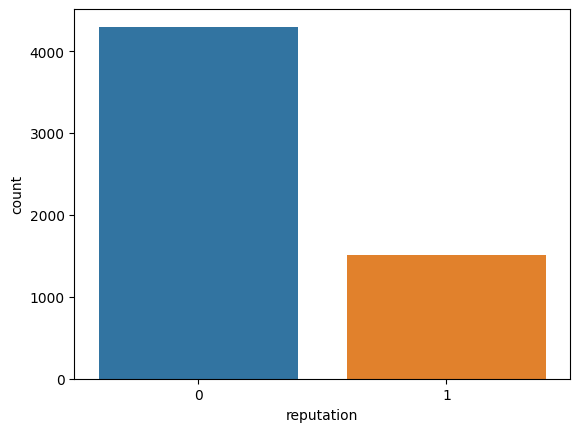

In [81]:
# Exibindo um gráfico para observar o balanceamento da classe
sns.countplot(data=df, x='reputation');

A classe alvo parece desbalanceada então provavelmente será necessário utilizar técnicas de balanceamento de classes para extrairmos um melhor desempenho do modelo de classificação.

Já que para resolução desse desafio o modelo que será utilizado vai ser o RandomForest é necessario fazer a importação do mesmo

In [82]:
# Importando o modelo
from sklearn.ensemble import RandomForestClassifier

# Separando os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

#### *Classificação com Random Forest*

In [83]:
# Criando o modelo
modelo = RandomForestClassifier()

# Treinando o modelo
modelo.fit(X_treino, y_treino)

RandomForestClassifier()

In [84]:
# Fazendo as predições
pred = modelo.predict(X_teste)

Agora, com todas as previsões feitas, vamos analisar o desempenho do modelo.

In [15]:
# Criando função para visualizar as métricas dos modelos
def metricas(real, preditos):
    print("Acurácia: {:.5f}".format(accuracy_score(real, preditos)))
    print("Precisão: {:.5f}".format(precision_score(real, preditos)))
    print("Sensibilidade: {:.5f}".format(recall_score(real, preditos)))
    print("F1-score: {:.5f}".format(f1_score(real, preditos)))

In [86]:
# Observando a matriz de confusão
print(pd.crosstab(y_teste, pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0   1   All
Real                   
0         854   6   860
1         287  15   302
All      1141  21  1162


In [87]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste, pred)

Acurácia: 0.74785
Precisão: 0.71429
Sensibilidade: 0.04967
F1-score: 0.09288


#### *Undersampling*

In [17]:
# Importando a biblioteca
from imblearn.under_sampling import TomekLinks

In [51]:
# Importa a técnica Tomek Links para subamostragem
tl = TomekLinks(sampling_strategy='majority')

In [52]:
# Aplicando a técnica aos dados originais X e y
X_under, y_under = tl.fit_resample(X_treino, y_treino)

In [ ]:
# Divide os dados subamostrados em conjuntos de treino e teste
X_treino_u, X_teste_u, y_treino_u, y_teste_u = train_test_split(X_under, y_under, test_size=0.2, stratify=y_over)

In [53]:
# Criando o modelo
modelo_u = RandomForestClassifier()

In [54]:
# Treinando o modelo
modelo_u.fit(X_treino_u, y_treino_u)

RandomForestClassifier()

In [55]:
# Fazendo as previsões
pred = modelo_u.predict(X_teste_u)

Agora, com todas as previsões feitas, vamos analisar o desempenho do modelo.

In [23]:
# Criando função para visualizar as métricas dos modelos
def metricas(real, preditos):
    print("Acurácia: {:.5f}".format(accuracy_score(real, preditos)))
    print("Precisão: {:.5f}".format(precision_score(real, preditos)))
    print("Sensibilidade: {:.5f}".format(recall_score(real, preditos)))
    print("F1-score: {:.5f}".format(f1_score(real, preditos)))

In [56]:
# Observando a matriz de confusão
print(pd.crosstab(y_teste_u, pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0   1   All
Real                   
0         866  18   884
1         259  19   278
All      1125  37  1162


In [57]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste_u, pred)

Acurácia: 0.76162
Precisão: 0.51351
Sensibilidade: 0.06835
F1-score: 0.12063


**Conclusão**

- A alta precisão sugere que quando o modelo prevê a classe positiva, ele geralmente está correto.

- A baixa sensibilidade indica que o modelo tem dificuldade em identificar corretamente a classe positiva, resultando em muitos falsos negativos.

#### *Oversampling*

In [26]:
# Importando a biblioteca
from imblearn.over_sampling import SMOTE

In [58]:
# Criando o modelo
oversample = SMOTE()

In [59]:
# Aplicando a técnica aos dados originais X e y
X_over, y_over = oversample.fit_resample(X, y)

In [60]:
# Divide os dados subamostrados em conjuntos de treino e teste
X_treino_o, X_teste_o, y_treino_o, y_teste_o = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)

In [61]:
# Criando o modelo
modelo_o = RandomForestClassifier()

In [62]:
# Treinando o modelo
modelo_o.fit(X_treino_o, y_treino_o)

RandomForestClassifier()

In [63]:
# Fazendo as previsões
pred = modelo_o.predict(X_teste_o)

Agora, com todas as previsões feitas, vamos analisar o desempenho do modelo.

In [44]:
# Criando função para visualizar as métricas dos modelos
def metricas(real, preditos):
    print("Acurácia: {:.5f}".format(accuracy_score(real, preditos)))
    print("Precisão: {:.5f}".format(precision_score(real, preditos)))
    print("Sensibilidade: {:.5f}".format(recall_score(real, preditos)))
    print("F1-score: {:.5f}".format(f1_score(real, preditos)))

In [64]:
# Observando a matriz de confusão
print(pd.crosstab(y_teste_o, pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1   All
Real                   
0        693  167   860
1        161  699   860
All      854  866  1720


In [65]:
# Observando as métricas do modelo, em comparação com novos dados
metricas(y_teste_o, pred)

Acurácia: 0.80930
Precisão: 0.80716
Sensibilidade: 0.81279
F1-score: 0.80997


**Conclusão**

- É possivél notar uma grande melhora em todas as métricas, esse modelo apresentou um bom desempenho

- O F1-score confirma um equilíbrio satisfatório entre precisão e sensibilidade